<div align='center'>
<font size = 7><font face="Product-Sans"><b><font color= "4285F4">G</font><font color= "DB4437">o</font><font color = "F4B400">o</font><font color= "4285F4">g</font><font color= "0F9D58">l</font><font color= "DB4437">e</font></b></font> - <font color = "C99700">Notre Dame</font></a> <font color = "4285F4">XLS Playground</font></font>
</div>

<div align='center'>
<img src='https://google.github.io/xls/images/xls_logo.svg' alt='XLS Logo' width=400><img src='https://raw.githubusercontent.com/mmorri22/cse30342/main/ND%20Chip%20Logo.png' alt='ND Chip Logo' width=180>
<img src="https://opensource.google/static/images/os-anim-main.gif" width=180>
</div>

<div align='center'>
<font size = 6><font color = "00843D">Lecture 27 - In-Class Starter -  DSLX Procs for Finite State Machines</font></a></font>
</div>

## XLS Setup

For each new Colab notebook, you will need to run the XLS setup again. If your computer switches networks, or you restart, you will need to run those commands again. This consists of the same two setup steps from Chapter 1. You must run both in order to properly run the XLS flow.


> Note: Here is the common error message that will occur if you ran a DSLX cell and you need need to re-run the setup. If you encounter this message, simply re-run these two steps and the error will be resolved when you go back to that cell:
>
> <code>UsageError: Cell magic `%%dslx` not found.</code>

# <font color = "red">Design Run Setup</font>

## To set up the design flow, run the next cell to set up the back end of XLS

> You will need to run this setup at every new runtime instance.

In [ ]:
#@title Start-up Step 1: XLS and OpenRoad scripts {run:"auto"}

!rm -rf *

# Import required Python libraries
import os
import pathlib
import sys
import jinja2
import IPython.display
import PIL.Image
import graphviz
import pathlib

from IPython.display import display, display_png

# Set Stable XLS Version for classroom environment
xls_version = 'v0.0.0-4699-gfb023174' #@param {type:"string"}

!echo '📦 downloading xls-{xls_version}'
!curl --show-error -L https://github.com/proppy/xls/releases/download/{xls_version}/xls-{xls_version}-linux-x64.tar.gz | tar xzf - --strip-components=1
!echo '🧪 setting up colab integration'
!python -m pip install --quiet --no-cache-dir --ignore-installed https://github.com/proppy/xls/releases/download/{xls_version}/xls_colab-0.0.0-py3-none-any.whl
!python -m pip install logger
!python -m pip install colabtools
import logger
import xls.contrib.colab
_ = xls.contrib.colab.register_dslx_magic()

# Must verify xls_work_dir is created
!if test -d xls_work_dir; then echo "xls_work_dir exists"; else mkdir xls_work_dir;  fi

#@title  First Run Only #4 - OpenRoad Setup {run:"auto"}

yosys_version = '0.38_93_g84116c9a3' #@param {type:"string"}
openroad_version = '2.0_12381_g01bba3695' #@param {type:"string"}
rules_hdl_version = '2eb050e80a5c42ac3ffdb7e70392d86a6896dfc7' #@param {type:"string"}

# Install stable OpenROAD Version
!echo '🛣️ installing openroad and friends'
!curl -L -O https://repo.anaconda.com/miniconda/Miniconda3-py310_24.1.2-0-Linux-x86_64.sh
!bash Miniconda3-py310_24.1.2-0-Linux-x86_64.sh -b -p conda-env/
import pathlib
conda_prefix_path = pathlib.Path('conda-env')
CONDA_PREFIX = str(conda_prefix_path.resolve())
%env CONDA_PREFIX={CONDA_PREFIX}
!conda-env/bin/conda install -yq -c "litex-hub" openroad={openroad_version} yosys={yosys_version}

!python -m pip install gdstk tqdm

!gsutil cp gs://proppy-eda/pdk_info_asap7.zip .
!gsutil cp gs://proppy-eda/pdk_info_sky130.zip .

!unzip -q -o pdk_info_asap7.zip
!unzip -q -o pdk_info_sky130.zip

!echo '🧰 generating PDK metadata'
!curl --show-error -L  https://github.com/hdl/bazel_rules_hdl/archive/{rules_hdl_version}.tar.gz | tar xzf - --strip-components=1
!curl -L -O https://github.com/protocolbuffers/protobuf/releases/download/v24.3/protoc-24.3-linux-x86_64.zip
!unzip -q -o protoc-24.3-linux-x86_64.zip
!{sys.executable} -m pip install protobuf

!echo '📁 organizing PDK for XLS and OpenROAD Flows'
!wget https://raw.githubusercontent.com/mmorri22/cse30321/main/xls/xls_setup.py
!wget https://raw.githubusercontent.com/mmorri22/cse30321/main/xls/sky130_data_pdk_info.textproto
!python xls_setup.py
!mv /content/sky130_data_pdk_info.textproto /content/com_google_skywater_pdk_sky130_fd_sc_hd/sky130_data_pdk_info.textproto
!echo '🖼️ Setup for viewing 3D GDSII File'
!python -m pip install numpy
!python -m pip install gdspy
!python -m pip install numpy-stl
!python -m pip install triangle
!python -m pip install k3d

# gdspy is used to open the gds file
import gdspy

# Used to write the output stl file (Why we installed numpy-stl)
from stl import mesh

# Using numpy will permit fast calculations on lots of points
import numpy as np
import matplotlib

# Required to triangulate polygons
import triangle

# To render in 3d
import k3d

📦 downloading xls-v0.0.0-4699-gfb023174
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 40.8M  100 40.8M    0     0  13.0M      0  0:00:03  0:00:03 --:--:-- 15.4M
🧪 setting up colab integration
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.1/182.1 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for logger: filename=logger-1.4-py3-none-any.whl size=1759 sha256=bf6b6e61773a478b1ed03e07ad6d8ff8e22316add86d2e59593fce6eefe6ff0f
  Stored in directory: /root/.cache/pip/wheels/fb/19/7b/09fc73f7503166eaf7f31b4aa0095b7f78af2ec0898e1f8312
Successfully built logger
[28/Apr/2024 12:20:23] INFO - NumExpr defaulting to 2 threads.
xls_work_dir exists
🛣️ installing openroad and friends
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
            

In [ ]:
#@title Start-up Step 2: Select your PDK {run:"auto"}

pdk = 'sky130' #@param ["asap7", "sky130"] {allow-input: false}

xls.contrib.colab.pdk = pdk


#@title Select your PDK {run:"auto"}

!bin/protoc --python_out=. pdk/proto/pdk_info.proto
!ln -sf pdk/proto/pdk_info_pb2.py
import pdk_info_pb2

import enum
import dataclasses
import json
import pathlib
import subprocess
from typing import Any, Callable, Dict, Optional, Union

from google.colab import widgets
from google.protobuf import text_format
import pandas as pd

yosys = conda_prefix_path / 'bin/yosys'
openroad = conda_prefix_path / 'bin/openroad'
yosys_tcl = 'synthesis/synth.tcl'

default_work_dir = xls.contrib.colab.default_work_dir

def pdk_info_proto(
    path: pathlib.Path, optional: bool = False
) -> Optional[pdk_info_pb2.PdkInfoProto]:
  """Load PDK info from prototext.

  Args:
    path: path to prototext file.
    optional: if True, failure to access the pdk info will not produce an error.

  Returns:
    Decoded pdk info proto or None if optional.
  """
  if optional and not path.exists():
    return None
  with path.open('r') as f:
    proto = pdk_info_pb2.PdkInfoProto()
    text_format.Parse(f.read(), proto)
    return proto

pdks = {

    'asap7': {
        'delay_model': 'asap7',
        'pdk_info': pdk_info_proto(
            pathlib.Path('asap7/asap7_data_pdk_info.textproto'),
        ),
    },

    'sky130': {
        'delay_model': 'sky130',
        'pdk_info': pdk_info_proto(
            pathlib.Path('com_google_skywater_pdk_sky130_fd_sc_hd/sky130_data_pdk_info.textproto'),
        ),
    },
}

@dataclasses.dataclass(frozen=True)
class RelativeCoreArea:
  utilization_percent: float


@dataclasses.dataclass(frozen=True)
class AbsoluteCoreArea:
  core_width_microns: int
  core_padding_microns: int


@enum.unique
class ImplementationStep(enum.Enum):
  """Steps in the implementation flow."""

  XLS = 'xls'
  SYNTHESIS = 'synthesis'
  PLACEMENT = 'placement'


class PdkRuntimeError(RuntimeError):
  pass


class OpenroadRuntimeError(RuntimeError):
  pass


class OpenstaRuntimeError(RuntimeError):
  pass


class YosysRuntimeError(RuntimeError):
  pass


@dataclasses.dataclass(frozen=True)
class SynthesisResults:
  synth_v: pathlib.Path
  design_stats: pd.DataFrame
  cell_stats: pd.DataFrame


def run_synthesis(
    *,
    selected_pdk: Optional[str] = None,
    work_dir: pathlib.Path = default_work_dir,
    silent: bool = False,
) -> SynthesisResults:
  """Run synthesis with Yosys.

  Args:
    selected_pdk: The pdk to use.
    work_dir: Directory that contains verilog and will be where outputs are put.
    silent: Suppress output.

  Returns:
    Metrics from running synthesis.

  Raises:
    PdkRuntimeError: on PDK error.
    YosysRuntimeError: on yosys error.
  """
  if selected_pdk is None:
    selected_pdk = pdk
  pdk_info = pdks[selected_pdk]['pdk_info']
  if pdk_info is None:
    raise PdkRuntimeError(f'PDK "{selected_pdk}" is restricted')

  liberty = (pathlib.Path(pdk) / pathlib.Path(pdk_info.liberty_path).name).resolve()
  synth_v = (work_dir / 'user_module_synth.v').resolve()
  synth_v_flist = (work_dir / 'user_module_synth_v.flist').resolve()
  synth_uhdm_flist = (work_dir / 'user_module_synth_uhdm.flist').resolve()
  synth_uhdm_flist.touch()
  synth_stats_json = (work_dir / 'user_module_synth_stats.json').resolve()
  dont_use_args = ' '.join(
      f'-dont_use {pat}'
      for pat in pdk_info.do_not_use_cell_list
  )
  # run yosys synthesis
  with synth_v_flist.open('w') as f:
    top_v = work_dir / 'user_module.sv'
    f.write(str(top_v.resolve()))
  !FLIST='{synth_v_flist}' ABC_SCRIPT='' CONSTR='' TOP='user_module' OUTPUT='{synth_v}' UHDM_FLIST='{synth_uhdm_flist}' LIBERTY='{liberty}' STATS_JSON='{synth_stats_json}' DONT_USE_ARGS='{dont_use_args}' {yosys} -c '{yosys_tcl}'
  with synth_stats_json.open('r') as f:
    synth_stats = json.load(f)
  design_stats = synth_stats['design']
  cells_stats = design_stats.pop('num_cells_by_type')
  design_stats = pd.DataFrame.from_dict(
      design_stats, orient='index', columns=['cells']
  )
  cells_stats = pd.DataFrame.from_dict(
      cells_stats, orient='index', columns=['stats']
  )

  return SynthesisResults(
      synth_v=synth_v, design_stats=design_stats, cell_stats=cells_stats
  )


def run_opensta(
    *,
    selected_pdk: Optional[str] = None,
    work_dir: pathlib.Path = default_work_dir,
    silent: bool = False,
) -> pd.DataFrame:
  """Run OpenSta and collect timing metrics.

  Args:
    selected_pdk: The pdk to use.
    work_dir: Directory that contains verilog.
    silent: Suppress output.

  Returns:
    Dataframe containing timing report.

  Raises:
    OpenstaRuntimeError: on OpenSTA error.
    PdkRuntimeError: on PDK error.
  """
  if selected_pdk is None:
    selected_pdk = pdk
  pdk_info = pdks[selected_pdk]['pdk_info']
  if pdk_info is None:
    raise PdkRuntimeError(f'PDK "{selected_pdk}" is restricted')

  liberty = pathlib.Path(pdk) / pdk_info.liberty_path
  tech_lef = pathlib.Path(pdk) / pdk_info.tech_lef_path
  read_cell_lefs = '\n'.join(
      f'read_lef {pathlib.Path(pdk) / cell_lef_path}'
      for cell_lef_path in pdk_info.cell_lef_paths
  )
  synth_v = work_dir / 'user_module_synth.v'
  top = 'user_module'
  opensta_log = work_dir / 'user_module_sta.log'

  openroad_script = f"""
  sta::redirect_file_begin {opensta_log}
  read_lef {tech_lef}
  {read_cell_lefs}
  read_liberty {liberty}
  read_verilog {synth_v}
  link_design  {top}
  report_checks -unconstrained
  sta::redirect_file_end
  """
  openroad_tcl = work_dir / 'openroad_sta.tcl'
  with openroad_tcl.open('w') as f:
    f.write(openroad_script)

  # run opensta static timing analysis
  !{openroad} {openroad_tcl} -exit

  columns = ['delay', 'time', 'edge', 'net', 'gate']

  import re
  def sta_report_paths(opensta_log):
    with open(opensta_log) as f:
      sta_report = f.read()
    m = re.search(r'---+(.*)---+', sta_report, flags=re.M | re.S)
    for path in m.group(1).split('\n')[1:-2]:
      parts = path.split(None, maxsplit=len(columns) - 1)
      yield float(parts[0]), float(parts[1]), parts[2], parts[3], parts[4]

  df = pd.DataFrame.from_records(sta_report_paths(opensta_log), columns=columns)
  df['gate'] = df['gate'].str.replace('[()]', '', regex=True)

  return df


@dataclasses.dataclass(frozen=True)
class PlacementResults:
  openroad_global_placement_layout: pathlib.Path
  area: pd.DataFrame
  metrics: pd.DataFrame
  power: pd.DataFrame


def run_placement(
    *,
    clock_period_ps: int,
    placement_density: float,
    core_area: Union[RelativeCoreArea, AbsoluteCoreArea],
    selected_pdk: Optional[str] = None,
    work_dir: pathlib.Path = default_work_dir,
    silent: bool = False,
) -> PlacementResults:
  """Run OpenRoad placement.

  Args:
    clock_period_ps: Clock period in picoseconds.
    placement_density: Placement density in [0.0, 1.0].
    core_area: Relative or absolute core area specification.
    selected_pdk: The pdk to use.
    work_dir: Directory that contains verilog and will be where outputs are put.
    silent: Suppress output.

  Returns:
    Outputs from running placement.

  Raises:
    OpenroadRuntimeError: on OpenRoad error.
    OpenstaRuntimeError: on OpenSTA error.
    PdkRuntimeError: on PDK error.
    ValueError: on invalid inputs.
    YosysRuntimeError: on yosys error.
  """
  clock_period_ns = clock_period_ps / 1000.0
  if selected_pdk is None:
    selected_pdk = pdk
  pdk_info = pdks[selected_pdk]['pdk_info']
  if pdk_info is None:
    raise PdkRuntimeError(f'PDK "{selected_pdk}" is restricted')

  liberty = pathlib.Path(pdk) / pdk_info.liberty_path
  tech_lef = pathlib.Path(pdk) / pdk_info.tech_lef_path
  read_cell_lefs = '\n'.join(
      f'read_lef {pathlib.Path(pdk) / cell_lef_path}'
      for cell_lef_path in pdk_info.cell_lef_paths
  )

  if isinstance(core_area, AbsoluteCoreArea):
    die_side_microns = (
        core_area.core_width_microns + core_area.core_padding_microns * 2
    )
    core_side_microns = (
        core_area.core_width_microns + core_area.core_padding_microns
    )
    initialize_floorplan_args = (
        f' -die_area "0 0 {die_side_microns} {die_side_microns}" -core_area'
        f' "{core_area.core_padding_microns} {core_area.core_padding_microns} {core_side_microns} {core_side_microns}"'
    )
  elif isinstance(core_area, RelativeCoreArea):
    initialize_floorplan_args = (
        f' -utilization {core_area.utilization_percent} -aspect_ratio 1.0'
    )
  else:
    raise ValueError(
        'Expected core_area to be AbsoluteCoreArea or RelativeCoreArea, got'
        f' {core_area!r}'
    )

  initialize_floorplan_command = (
      f'initialize_floorplan -site "{pdk_info.cell_site}"'
      f' {initialize_floorplan_args}'
  )

  def source_pdk_info_tcl(path):
    return f'source {pathlib.Path(pdk) / path}' if path else ''

  source_tracks_file = source_pdk_info_tcl(pdk_info.tracks_file_path)
  source_rc_script_configuration = source_pdk_info_tcl(
      pdk_info.rc_script_configuration_path
  )
  source_pdn_config = source_pdk_info_tcl(pdk_info.pdn_config_path)
  if pdk_info.tapcell_tcl_path:
    tapcell_command = source_pdk_info_tcl(pdk_info.tapcell_tcl_path)
  else:
    tapcell_command = (
        f'tapcell -distance {pdk_info.tapcell_distance} -tapcell_master'
        f' {pdk_info.tap_cell}'
    )

  synth_v = work_dir / 'user_module_synth.v'
  openroad_metrics = work_dir / 'openroad_metrics.json'
  openroad_global_placement_layout = work_dir / 'openroad_global_placement.png'

  openroad_script = f"""
  read_lef {tech_lef}
  {read_cell_lefs}
  read_liberty {liberty}
  read_verilog {synth_v}
  link_design user_module
  {initialize_floorplan_command}
  {source_tracks_file}
  insert_tiecells {pdk_info.tie_high_port} -prefix "TIE_ONE_"
  insert_tiecells {pdk_info.tie_low_port} -prefix "TIE_ZERO_"
  create_clock [get_ports clk] -period {clock_period_ns}
  {source_rc_script_configuration}
  set_wire_rc -signal -layer "{pdk_info.wire_rc_signal_metal_layer}"
  set_wire_rc -clock  -layer "{pdk_info.wire_rc_clock_metal_layer}"
  place_pins -hor_layers {pdk_info.pin_horizontal_metal_layer} -ver_layers {pdk_info.pin_vertical_metal_layer}
  {tapcell_command}
  {source_pdn_config}
  pdngen -verbose
  global_placement -timing_driven -routability_driven -density {placement_density} -pad_left {pdk_info.global_placement_cell_pad} -pad_right {pdk_info.global_placement_cell_pad}
  remove_buffers
  estimate_parasitics -placement
  repair_design
  repair_timing
  utl::metric "utilization_percent" [rsz::utilization]
  utl::metric "design_area" [rsz::design_area]
  utl::metric "power" [sta::design_power [sta::parse_corner {{}}]]
  utl::metric "wns" [sta::worst_slack -max]
  report_power
  report_design_area
  if {{[info procs save_image] == "save_image"}} {{
    save_image -resolution 0.005 "{openroad_global_placement_layout}"
  }}
  """
  openroad_tcl = work_dir / 'place.tcl'
  with openroad_tcl.open('w') as f:
    f.write(openroad_script)
  !QT_QPA_PLATFORM=minimal {openroad} -metrics {openroad_metrics} -exit {openroad_tcl}

  with open(work_dir / 'openroad_metrics.json', 'r') as f:
    metrics = json.loads(f.read())
  df_area = pd.DataFrame.from_dict(
      {
          'global placement': [
              float(metrics['design_area']) * 1e12,
              float(metrics['utilization_percent']) * 100,
          ]
      },
      columns=['area', 'utilization'],
      orient='index',
  )
  metrics_power = [float(m) * 1e6 for m in metrics['power'].split(' ')]
  df_power = pd.DataFrame().from_dict(
      {
          'sequential': metrics_power[4:8],
          'combinational': metrics_power[8:12],
          'clock': metrics_power[12:16],
          'macro': metrics_power[16:20],
          'pad': metrics_power[20:],
          'total': metrics_power[0:4],
      },
      orient='index',
      columns=['internal', 'switching', 'leakage', 'total'],
  )
  df_metrics = (
      pd.DataFrame.from_records([metrics])
      .transpose()
      .set_axis(['metrics'], axis=1)
  )
  return PlacementResults(
      openroad_global_placement_layout=openroad_global_placement_layout,
      area=df_area,
      metrics=df_metrics,
      power=df_power,
  )

## Combining Logic Design and Computer Architecture: Using a Finite State Machine to Drive a Datapath

While we are running the start-up script and initializing the PDK, we will review the steps of setting up a DSLX proc.

> <a href = "https://colab.research.google.com/drive/1cPAO8-FidUr9vrAxXvdL1C2E0icrNKyM#forceEdit=true&sandboxMode=true&scrollTo=3yQ94VDmX6dk">Reading 14 - The Synchronous Model of Computation - Building our FSM with a DSLX Proc</a>

## Finite State Machine

Consider the Finite State Machine below: The format is <code>state_name / output</code>. For example, any time you reach the state <code>q0</code>, the output will be a <code>0</code>. Conversely, any time you reach the state <code>q3</code>, the output will be a <code>0</code>.

<b>Start State</b>: <code>q0</code><br />
<b>Control Signals</b>: <code>{1, 1, 0, 1, 0, 0, 0, 1, 1}</code><br />

Here is how you would derive the results:
<ol>
    <li>The start state for this step is <code>q0</code>, so the output is <code>0</code> and the control input is <code>1</code>. The edge takes to <font color="red"><code>q2</code></font></li>
    <li>The start state for this step is <code>q2</code>, so the output is <code>0</code>, and the control input is <code>1</code>. The edge takes to <code>q2</code></li>
    <li>The start state for this step is <code>q2</code>, so the output is <code>0</code>, and the control input is <code>0</code>. The edge takes to <code>q4</code></li>
    <li>The start state for this step is <code>q4</code>, so the output is <code>1</code>, and the control input is <code>1</code>. The edge takes to <code>q3</code></li>
    <li>The start state for this step is <code>q3</code>, so the output is <code>1</code>, and the control input is <code>0</code>. The edge takes to <code>q4</code></li>
    <li>The start state for this step is <code>q4</code>, so the output is <code>1</code>, and the control input is <code>0</code>. The edge takes to <code>q1</code></li>
    <li>The start state for this step is <code>q1</code>, so the output is <code>0</code>, and the control input is <code>0</code>. The edge takes to <code>q1</code></li>
    <li>The start state for this step is <code>q1</code>, so the output is <code>0</code>, and the control input is <code>1</code>. The edge takes to <code>q3</code></li>
        <li>The start state for this step is <code>q3</code>, so the output is <code>1</code>, and the control input is <code>1</code>. The edge takes to <code>q2</code></li>
</ol>


<img src = "https://media.geeksforgeeks.org/wp-content/uploads/1-43.jpg" height=400 width=500>

The solution is <code>{0, 0, 0, 1, 1, 1, 0, 0, 1}</code>

Solution Table:

| Start State | Output | Control | Next State |
|---|---|---|---|
|q0|<font color="red">0</font>|1|q2|
|q2|<font color="red">0</font>|1|q2|
|q2|<font color="red">0</font>|0|q4|
|q4|<font color="red">1</font>|1|q3|
|q3|<font color="red">1</font>|0|q4|
|q4|<font color="red">1</font>|0|q1|
|q1|<font color="red">0</font>|0|q1|
|q1|<font color="red">0</font>|1|q3|
|q3|<font color="red">1</font>|1|q2|

## Building our FSM example with a DSLX proc

In this section, we will develop an algorithm for designing and testing procs.

### Step 1: Develop the combinational elements of the proc.

In this case, we will use <code>match</code> statements and <code>struct STATE_RES</code> to represent the logic shown in the FSM. Note that this does not contain any memory elment, just the logic between the states.

In the context of Transaction Level Modeling, this is the <b>module</b> (<code>fsm_logic</code>) that defines the process (calculating the next output and next state).

Here is our Finite State Machine that we presented earlier:<br>
<img src = "https://media.geeksforgeeks.org/wp-content/uploads/1-43.jpg" height=400 width=500>

And here is the corresponding combinational logic used to traverse the states, given an input <code>curr_state:u3</code> and a <code>control:u1</code> signal:

    struct STATE_RES{
        output:u1,
        state:u3
    }

    fn fsm_logic( curr_state:u3, control:u1 ) -> STATE_RES {

        match( curr_state ){

            // Start State 0 - Output is 0
            u3:0 => {
                // Next State for control 0 is 1
                if(control == u1:0){

                    // Output, Next State
                    STATE_RES{ output:u1:0, state:u3:1 }
                }
                // Next State is 2
                else{
                    STATE_RES{ output:u1:0, state:u3:2 }
                }
            },

            // State 1, output is 0
            u3:1 =>{
                // Next State for control 0 is 1
                if(control == u1:0){

                    // Output, Next State
                    STATE_RES{ output:u1:0, state:u3:1 }
                }
                // Next State is 3
                else{
                    STATE_RES{ output:u1:0, state:u3:3 }
                }
            },

            // State 2, output is 0
            u3:2 =>{
                // Next State for control 0 is 4
                if(control == u1:0){

                    // Output, Next State
                    STATE_RES{ output:u1:0, state:u3:4 }
                }
                // Next State is 2
                else{
                    STATE_RES{ output:u1:0, state:u3:2 }
                }
            },

            // State 3, output is 1
            u3:3 =>{
                // Next State for control 0 is 4
                if(control == u1:0){

                    // Output, Next State
                    STATE_RES{ output:u1:1, state:u3:4 }
                }
                // Next State is 2
                else{
                    STATE_RES{ output:u1:1, state:u3:2 }
                }
            },

            // State 4, output is 1 - Final Case
            _ =>{
                // Next State for control 0 is 1
                if(control == u1:0){

                    // Output, Next State
                    STATE_RES{ output:u1:1, state:u3:1 }
                }
                // Next State is 3
                else{
                    STATE_RES{ output:u1:1, state:u3:3 }
                }
            }
        }
    }


## Step 2: Develop the proc name and input/output channels

Next, we will define our <b>ports</b> and <b>channels</b>. The <code>proc</code> defines the module for the procedure.

The way a channel is defined in DSLX is to use the <code>chan</code> keyword, the bitwidth of the channel, and define its direction, as channels are unidirectional.

        // define control as input channel
        control: chan<u1> in;

In our example, the Finite State Machine has an input (the control signal) and an output (the generated result at each state). Note that we have not yet defined the "next" state, since we will later define the next state as a memory element internal to the proc:

    proc fsm_example_proc {

        // define control as input channel
        control: chan<u1> in;

        // define output as an output channel
        output: chan<u1> out;

## Step 3: Define the memory element

The internal memory element is defined using a procedure called <code>init</code>. In this procedure, you can define an internal memory element that will be preserved throughout the entire operation.

In this case, we have five states in our finite state machine with an initial state of 0, so we define the state as <code>u3:0</code>:

    // `init` returns the output and state `0` for the sequential logic.
    // Initialize the state, and we will save this as the intermediate register
    init {
        u3:0
    }

## Step 4: Matching the ports to the channels

We will configure the ports and channels using the <code>config</code> procedure. The <code>config</code> procedure takes external channels as parameters and returns channel used by the sequential logic.

The approach to defining a config in DSLX is:
<ul>
  <li>Use the <code>config</code> keyword</li>
  <li>Put the input and output channels as inputs to the config procedure. Be sure they are in the identical order as you define them at the beginning of the proc.</li>
  <li>Map them as an output</li>
</ul>

    // `config` takes external channels as parameters and returns channel used by the sequential logic.
    // similar to the module input and output definitions in Verilog.
    config(control: chan<u1> in, output: chan<u1> out) {
        (control, output)
    }

At first glance, this may seem redundant, but let's consider the example problem from I/O polling where the processor is a 32-bit RISC-V CPU and the floppy drive with a 25KB/sec transfer rate over a 16-bit bus. We may use channel/port configurations to configure this communication protocol so we write the result from the RISC-V processor to the floppy drive at the appropriate rate.

<img src = "https://github.com/mmorri22/cse30321/blob/main/xls/Reading%2014/FSM%202.png?raw=true" height=400>

## Step 5 - Defining the internal loop with the next procedure

After the <code>config</code> procedure, we will use the <code>next</code> procedure to perform the sequential tasks. The inputs to the procedure are a token and the accumulator (the value we are storing):

<ul>
  <li><code>token</code> - Keyword used to define the next token for the clock signal</li>
  <li><code>state</code> - The state that corresponds to the <code>u3:0</code> we defined in the <code>init</code> procedure.</li>
</ul>

    // Step 5 - Defining the internal procedure
    next(tok: token, state: u3) {

Inside the procedure, we use the <code>recv</code> to correspond <code>tok</code> to the input channels. We will define each input channel separately, and then we will <code>join</code> them so that the channels are defined in parallel.

Let's say we had two control inputs (control_1 and control_2). We would define and join them to the internal module with lines control_in1 and control_in2. Then, they would be joined in a tok_c.

        // receive one bit value control from the input channel.
        let (tok_a, control_in1) = recv(tok, control_1);

        // receive one bit value control from the input channel.
        let (tok_b, control_in2) = recv(tok, control_2);

        // Join all recv operation so they are performed in parallel.
        let tok_c = join(tok_a, tok_b);

In the case of our FSM example, we only need one <code>recv</code> and <code>join</code>, so our example code will appear as follows:

        // receive one bit value control from the input channel.
        let (tok_a, control_in) = recv(tok, control);

        // Join all recv operation so they are performed in parallel.
        let tok_b = join(tok_a);

Next, we perform the process itself

        // multiply `a` and `b` and add (accumulate) them to the previous `acc` value.
        let result:STATE_RES = fsm_logic(state, control_in);

<img src = "https://github.com/mmorri22/cse30321/blob/main/xls/Reading%2014/FSM%204.png?raw=true" height=400>

To produce the output, we will use the <code>send</code> module. The format is:
<ul>
  <li><code>tok</code> - Indicates the output will occur at the next clock</li>
  <li><code>output</code> - Indicates we will connect this signal to the output channel we defined in Step 1</li>
  <li><code>result.output</code> - Indicates we will put the <code>result.output</code> value on the output channel</li>
</ul>

        // send the result and carry to the output channel.
        send(tok, output, result.output);

Finally, we will place the value of <code>result.state</code> as our return, which will save it in the <code>u3</code> memory element we created in <code>init</code>:

        // return the accumulated result as the new state.
        result.state
    }

Here is a diagram connecting everything together, and the complete code proc may be found in the cell below:

> Note: we have not included a test proc yet.

<img src = "https://github.com/mmorri22/cse30321/blob/main/xls/Reading%2014/fsm_example_proc.png?raw=true">

### Common Synthesis Errors

On the Final Exam, you will be encouraged to find the shortest clock period that your design will run. You will likely come across error messages you may not be familiar with while trying to meet this objective:

There is a <b>deliberate synthesis error</b> in this initially presented code. Here is the error that will occur, which you will observe under the

><code>xls.contrib.colab.XlsRuntimeError(b'Error: INVALID_ARGUMENT: cannot achieve the specified pipeline length or full throughput. Try `--pipeline_stages=3` and `--worst_case_throughput=3`; Running pass #86: Pipeline Scheduling [short: pipesched]; Running pass #86: Top level scheduling pass pipeline [short: scheduling]')</code>

Notice my clock period is short: <code>--clock_period_ps=300</code>. If the clock period was <b>required</b>, then we could use the suggestions of <code>--pipeline_stages=3</code> and <code>--worst_case_throughput=3</code> to meet the requirement.

We could also multiply the clock period by 3. You can see that <code>--clock_period_ps=900</code> works.

But when we look at the schedule, we see that the delay is 566 ps. Try the synthesis again with 566, and you will see that it works.

In [ ]:
%%dslx --top=fsm_example_proc --pipeline_stages=1 --flop_inputs=true --flop_outputs=true --clock_period_ps=566 --reset=reset

import std;

// Step 1 - Develop the combinational elements of the proc.

// When you are returning an element from the state proc, develop a struct
struct STATE_RES{
    output:u1,
    state:u3
}


fn fsm_logic( curr_state:u3, control:u1 ) -> STATE_RES {

    match( curr_state ){

        // Start State 0 - Output is 0
        u3:0 => {
            // Next State for control 0 is 1
            if(control == u1:0){

                // Output, Next State
                STATE_RES{ output:u1:0, state:u3:1 }
            }
            // Next State is 2
            else{
                STATE_RES{ output:u1:0, state:u3:2 }
            }
        },

        // State 1, output is 0
        u3:1 =>{
            // Next State for control 0 is 1
            if(control == u1:0){

                // Output, Next State
                STATE_RES{ output:u1:0, state:u3:1 }
            }
            // Next State is 3
            else{
                STATE_RES{ output:u1:0, state:u3:3 }
            }
        },

        // State 2, output is 0
        u3:2 =>{
             // Next State for control 0 is 4
            if(control == u1:0){

                // Output, Next State
                STATE_RES{ output:u1:0, state:u3:4 }
            }
            // Next State is 2
            else{
                STATE_RES{ output:u1:0, state:u3:2 }
            }
        },

        // State 3, output is 1
        u3:3 =>{
             // Next State for control 0 is 4
            if(control == u1:0){

                // Output, Next State
                STATE_RES{ output:u1:1, state:u3:4 }
            }
            // Next State is 2
            else{
                STATE_RES{ output:u1:1, state:u3:2 }
            }
        },

        // State 4, output is 1 - Final Case
        _ =>{
             // Next State for control 0 is 1
            if(control == u1:0){

                // Output, Next State
                STATE_RES{ output:u1:1, state:u3:1 }
            }
            // Next State is 3
            else{
                STATE_RES{ output:u1:1, state:u3:3 }
            }
        }
    }
}

// Step 2 - Define the proc name and input and output challens
proc fsm_example_proc {

    // define control as input channel
    control: chan<u1> in;

    // define output as an output channel
    output: chan<u1> out;

    // `init` returns the output and state `0` for the sequential logic.
    // Initialize the state, and we will save this as the intermediate register
    init {
        u3:0
    }

    // `config` takes external channels as parameters and returns channel used by the sequential logic.
    // similar to the module input and output definitions in Verilog.
    config(control: chan<u1> in, output: chan<u1> out) {
        (control, output)
    }

    // Step 5 - Defining the internal procedure
    next(tok: token, state: u3) {

        // receive one bit value control from the input channel.
        let (tok_a, control_in) = recv(tok, control);

        // Join all recv operation so they are performed in parallel.
        let tok_b = join(tok_a);

        // multiply `a` and `b` and add (accumulate) them to the previous `acc` value.
        let result:STATE_RES = fsm_logic(state, control_in);

        // send the result and carry to the output channel.
        send(tok, output, result.output);

        // return the accumulated result as the new state.
        result.state
    }

}


#[test_proc]
proc proc_fsm_test {

  // define channels to communicate with the proc under test
  // Step 1 - Flip the ordering of the channels of the Design Under Test
  control_test: chan<u1> out;
  output_test: chan<u1> in;

  // Step 2 - Add a terminator bool
  terminator: chan<bool> out;

  // Empty init
  init { () }

  // 4.1 - `config` takes the `terminator` output channel as an argument.
  config(terminator: chan<bool> out) {

    // 4.2 - Outputs: define a channel pair (sender, receiver) to communicate output_test values as an output from the test module
    let (control_test, control_receiver) = chan<u1>;

    // 4.2 - define a channel pair (sender, receiver) to communicate control_test as an input to the test module
    let (output_sender, output_test) = chan<u1>;

    // 4-3 - Spawn a Proc that you will test
    spawn fsm_example_proc(control_receiver, output_sender);

    // 4-4 - Config the outputs as before
    (control_test, output_test, terminator)
  }

  // Step 5 - Use the next procedure and state to keep the running.
  next(tok: token, state: ()) {

      /////// Test 1 - Control = 1, Output - 0
      // send `1` as the control_test input.
      let tok_a = send(tok, control_test, u1:1);

      // wait for both send to complete (and overwrite the existing `tok` binding).
      let tok = join(tok_a);

      // receive and assert the result value.
      let (tok, output_sender) = recv(tok, output_test);

      // Test that the output is 0
      assert_eq(output_sender, u1:0);


      /////// Test 2 - Control = 1, Output - 0
      // send `1` as the control_test input.
      let tok_a = send(tok, control_test, u1:1);

      // wait for both send to complete (and overwrite the existing `tok` binding).
      let tok = join(tok_a);

      // receive and assert the result value.
      let (tok, output_sender) = recv(tok, output_test);

      // Test that the output is 0
      assert_eq(output_sender, u1:0);


      /////// Test 3 - Control = 0, Output - 0
      // send `0` as the first control_test input.
      let tok_a = send(tok, control_test, u1:0);

      // wait for both send to complete (and overwrite the existing `tok` binding).
      let tok = join(tok_a);

      // receive and assert the result value.
      let (tok, output_sender) = recv(tok, output_test);

      // Test that the output is 0
      assert_eq(output_sender, u1:0);


      /////// Test 4 - Control = 1, Output - 1
      // send `1` as the control_test input.
      let tok_a = send(tok, control_test, u1:1);

      // wait for both send to complete (and overwrite the existing `tok` binding).
      let tok = join(tok_a);

      // receive and assert the result value.
      let (tok, output_sender) = recv(tok, output_test);

      // Test that the output is 1
      assert_eq(output_sender, u1:1);


      /////// Test 5 - Control = 0, Output - 1
      // send `0` as the control_test input.
      let tok_a = send(tok, control_test, u1:0);

      // wait for both send to complete (and overwrite the existing `tok` binding).
      let tok = join(tok_a);

      // receive and assert the result value.
      let (tok, output_sender) = recv(tok, output_test);

      // Test that the output is 1
      assert_eq(output_sender, u1:1);


      /////// Test 6 - Control = 0, Output - 1
      // send `0` as the control_test input.
      let tok_a = send(tok, control_test, u1:0);

      // wait for both send to complete (and overwrite the existing `tok` binding).
      let tok = join(tok_a);

      // receive and assert the result value.
      let (tok, output_sender) = recv(tok, output_test);

      // Test that the output is 1
      assert_eq(output_sender, u1:1);


      /////// Test 7 - Control = 0, Output - 0
      // send `0` as the control_test input.
      let tok_a = send(tok, control_test, u1:0);

      // wait for both send to complete (and overwrite the existing `tok` binding).
      let tok = join(tok_a);

      // receive and assert the result value.
      let (tok, output_sender) = recv(tok, output_test);

      // Test that the output is 0
      assert_eq(output_sender, u1:0);


      /////// Test8 - Control = 1, Output - 0
      // send `0` as the control_test input.
      let tok_a = send(tok, control_test, u1:1);

      // wait for both send to complete (and overwrite the existing `tok` binding).
      let tok = join(tok_a);

      // receive and assert the result value.
      let (tok, output_sender) = recv(tok, output_test);

      // Test that the output is 0
      assert_eq(output_sender, u1:0);



      /////// Test9 - Control = 1, Output - 1
      // send `0` as the control_test input.
      let tok_a = send(tok, control_test, u1:1);

      // wait for both send to complete (and overwrite the existing `tok` binding).
      let tok = join(tok_a);

      // receive and assert the result value.
      let (tok, output_sender) = recv(tok, output_test);

      // Test that the output is 1
      assert_eq(output_sender, u1:1);


      /////////// Complete the test by sending tok, terminator, true
      let tok = send(tok, terminator, true);
  }

}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[ RUN UNITTEST  ] proc_fsm_test
[            OK ]
[===============] 1 test(s) ran; 0 failed; 0 skipped.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

chan user_module__control(bits[1], id=0, kind=streaming, ops=receive_only, flow_control=ready_valid, strictness=proven_mutually_exclusive, metadata="""""")
chan user_module__output(bits[1], id=1, kind=streaming, ops=send_only, flow_control=ready_valid, strictness=proven_mutually_exclusive, metadata="""""")

fn __user_module__fsm_logic(curr_state: bits[3], control: bits[1]) -> (bits[1], bits[3]) {
  literal.36: bits[3] = literal(value=3, id=36, pos=[(0,60,8)])
  literal.25: bits[3] = literal(value=2, id=25, pos=[(0,46,8)])
  literal.14: bits[3] = literal(value=1, id=14, pos=[(0,32,8)])
  literal.3: bits[3] = literal(value=0, id=3, pos=[(0,18,8)])
  eq.37: bits[1] = eq(literal.36, curr_state, id=37)
  eq.26: bits[1] = eq(literal.25, curr_state, id=26)
  eq.15: bits[1] = eq(literal.14, curr_state, id=15)
  eq.4: bits[1] = eq(literal.3, curr_state, id=4)
  literal.5: bits[1] = literal(value=0, id=5, pos=[(0,20,26)])
  literal

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

chan user_module__control(bits[1], id=0, kind=streaming, ops=receive_only, flow_control=ready_valid, strictness=proven_mutually_exclusive, metadata="""""")
chan user_module__output(bits[1], id=1, kind=streaming, ops=send_only, flow_control=ready_valid, strictness=proven_mutually_exclusive, metadata="""""")

top proc __user_module__fsm_example_proc_0_next(__token: token, __state: bits[3], init={0}) {
  literal.202: bits[3] = literal(value=1, id=202, pos=[(0,32,8)])
  literal.201: bits[3] = literal(value=2, id=201, pos=[(0,46,8)])
  literal.200: bits[3] = literal(value=3, id=200, pos=[(0,60,8)])
  eq.206: bits[1] = eq(__state, literal.202, id=206, pos=[(0,120,40)])
  bit_slice.275: bits[1] = bit_slice(__state, start=2, width=1, id=275, pos=[(0,120,40)])
  eq.205: bits[1] = eq(__state, literal.201, id=205, pos=[(0,120,40)])
  eq.204: bits[1] = eq(__state, literal.200, id=204, pos=[(0,120,40)])
  receive.63: (token, bits[1]) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

module user_module(
  input wire clk,
  input wire reset,
  input wire user_module__control_data,
  input wire user_module__control_valid,
  input wire user_module__output_ready,
  output wire user_module__output_data,
  output wire user_module__output_valid,
  output wire user_module__control_ready
);
  reg [2:0] ____state;
  reg __user_module__control_data_reg;
  reg __user_module__control_data_valid_reg;
  reg __user_module__output_data_reg;
  reg __user_module__output_data_valid_reg;
  wire p0_all_active_states_valid;
  wire user_module__output_data_valid_inv;
  wire __user_module__output_valid_buf;
  wire user_module__output_data_valid_load_en;
  wire or_509;
  wire or_510;
  wire user_module__output_data_load_en;
  wire p0_stage_done;
  wire pipeline_enable;
  wire user_module__control_data_valid_inv;
  wire user_module__control_data_valid_load_en;
  wire [2:0] result_state;
  wire user_module__control_data_load_en;
  wire result_output;
  assign p0_all_active_states_valid = 1'h1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

stage,node,node_delay_ps,path_delay_ps
0,__state,0,0
0,literal.202,0,0
0,literal.201,0,0
0,literal.200,0,0
0,__token,0,0
0,bit_slice.275,0,0
0,receive.63,0,0
0,literal.203,0,0
0,literal.494,0,0
0,control_in,0,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Common Synthesis Errors - Design Area

If you are running the synthesis code, and you get an error under <b>placement</b>, this is likely because you have a <code>core_width_microns</code> that is too small:

> <code>KeyError: 'design_area'</code>

In the case of the sky130 PDK, it will not synthesize under 30.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,stats
sky130_fd_sc_hd__a211oi_1,2
sky130_fd_sc_hd__a21boi_0,1
sky130_fd_sc_hd__a21oi_1,4
sky130_fd_sc_hd__a31oi_1,1
sky130_fd_sc_hd__dfxtp_1,7
sky130_fd_sc_hd__lpflow_isobufsrc_1,1
sky130_fd_sc_hd__mux2i_1,1
sky130_fd_sc_hd__nand2_1,4
sky130_fd_sc_hd__nand2b_1,2
sky130_fd_sc_hd__nand3_1,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,cells
num_wires,35.0000
num_wire_bits,35.0000
num_pub_wires,35.0000
num_pub_wire_bits,35.0000
num_memories,0.0000
num_memory_bits,0.0000
num_processes,0.0000
num_cells,30.0000
area,266.5056


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/* Generated by Yosys 0.38+92 (git sha1 84116c9a3, x86_64-conda-linux-gnu-cc 11.2.0 -fvisibility-inlines-hidden -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -fdebug-prefix-map=/root/conda-eda/conda-eda/workdir/conda-env/conda-bld/yosys_1708682838165/work=/usr/local/src/conda/yosys-0.38_93_g84116c9a3 -fdebug-prefix-map=/content/conda-env=/usr/local/src/conda-prefix -fPIC -Os -fno-merge-constants) */

(* hdlname = "user_module" *)
(* top =  1  *)
(* src = "/content/xls_work_dir/user_module.sv:1.1-62.10" *)
module user_module(clk, reset, user_module__control_data, user_module__control_valid, user_module__output_ready, user_module__output_data, user_module__output_valid, user_module__control_ready);
  (* src = "/content/xls_work_dir/user_module.sv:11.13-11.22" *)
  wire \____state[0] ;
  wire \____state[0]_sky130_fd_sc_hd__a31oi_1_B1_A2 ;
  wire \____state[0]_sky130_fd_sc_hd__a31oi_1_B1_A3 ;
  wire \____sta

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

delay,time,edge,net,gate
0.000000,0.000000,^,user_module__output_valid_$_SDFFE_PP0P__Q/CLK,sky130_fd_sc_hd__dfxtp_1
0.190000,0.190000,v,user_module__output_valid_$_SDFFE_PP0P__Q/Q,sky130_fd_sc_hd__dfxtp_1
0.070000,0.260000,^,user_module__output_ready_sky130_fd_sc_hd__nand2b_1_A_N/Y,sky130_fd_sc_hd__nand2b_1
0.070000,0.330000,v,__user_module__control_data_valid_reg_sky130_fd_sc_hd__nand2_1_A/Y,sky130_fd_sc_hd__nand2_1
0.250000,0.580000,v,____state_$_SDFFE_PP0P__Q_D_sky130_fd_sc_hd__a21oi_1_Y_A2_sky130_fd_sc_hd__or4b_1_X/X,sky130_fd_sc_hd__or4b_1
0.080000,0.660000,^,____state_$_SDFFE_PP0P__Q_D_sky130_fd_sc_hd__a21oi_1_Y/Y,sky130_fd_sc_hd__a21oi_1
0.000000,0.660000,^,____state_$_SDFFE_PP0P__Q/D,sky130_fd_sc_hd__dfxtp_1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

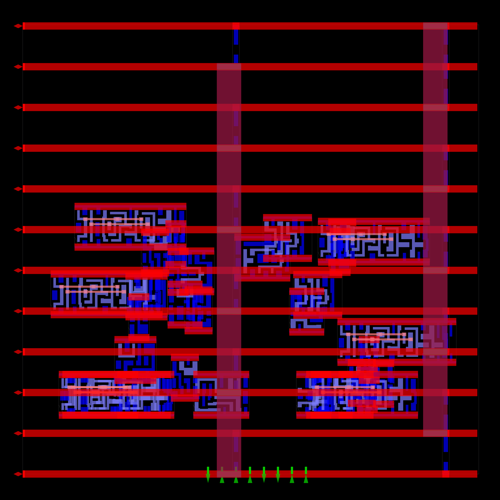

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,area,utilization
global placement,304.042 μm²,33.99 %


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,internal,switching,leakage,total
sequential,2222.270 uW,85.910 uW,0.188 uW,2308.368 uW
combinational,159.170 uW,115.844 uW,0.123 uW,275.138 uW
clock,0.000 uW,0.000 uW,0.000 uW,0.000 uW
macro,0.000 uW,0.000 uW,0.000 uW,0.000 uW
pad,0.000 uW,0.000 uW,0.000 uW,0.000 uW
total,2381.441 uW,201.754 uW,0.311 uW,2583.507 uW


<IPython.core.display.Javascript object>

In [ ]:
#@title Now let's synthesize our Finite State Machine {display-mode: "form"}
#@markdown - Click the ▷ button to run synthesis, static timing analysis and global placement
#@markdown - This 1-bit FSM will successfully synthesize in 30 micron core width

placement_density = 1 #@param {type:"slider", min:0, max:1.0, step:0.01}
clock_period_ps = 163 #@param {type:"slider", min:0, max:100000, step:1}
clock_period_ns = clock_period_ps / 1000.0
core_area = 'absolute' # @param ["relative", "absolute"]

# @markdown ### core_area_relative
# @markdown compute core area from the design size
utilization_percent = 43 #@param {type:"slider", min:0, max:100, step:1}
# @markdown ### core_area_absolute
# @markdown set core area explicitly
core_width_microns = 30 #@param {type:"slider", min:0, max:1000, step:1}
core_padding_microns = 0 #@param {type:"slider", min:0, max:100, step:1}

from IPython.display import display, display_png
import IPython.display
import PIL.Image

if core_area == 'relative':
  core_area_value = RelativeCoreArea(utilization_percent)
else:
  core_area_value = AbsoluteCoreArea(core_width_microns, core_padding_microns)

tb = widgets.TabBar(['synthesis', 'netlist', 'timing', 'placement', 'area', 'power'])

# run yosys synthesis
with tb.output_to('synthesis', select=True):
  synth_results = run_synthesis()
  tb.clear_tab()

with tb.output_to('synthesis', select=False):
  grid = widgets.Grid(1, 2, header_row=False, header_column=False)
  with grid.output_to(0, 0):
    display(synth_results.cell_stats)
  with grid.output_to(0, 1):
    display(synth_results.design_stats)

# display gate level netlist
with tb.output_to('netlist', select=False):
  with synth_results.synth_v.open('r') as f:
    print(f.read())


# run opensta static timing analysis
with tb.output_to('timing', select=True):
  opensta_results = run_opensta()
  tb.clear_tab()

# display opensta report
with tb.output_to('timing', select=False):
  display(
      opensta_results.style.hide(axis='index')
      .background_gradient(subset=['delay'], cmap='Oranges')
      .bar(subset=['time'], color='lightblue')
  )

# run openroad placement
with tb.output_to('placement', select=True):
  placement_results = run_placement(
      clock_period_ps=clock_period_ps,
      placement_density=placement_density,
      core_area=core_area_value,
  )
  tb.clear_tab()

# display global placement layout
with tb.output_to('placement', select=False):
  if placement_results.openroad_global_placement_layout.exists():
    img = PIL.Image.open(placement_results.openroad_global_placement_layout)
    img = img.resize((500, 500))
    display_png(img)

# display area estimate
with tb.output_to('area', select=False):
  display(
      placement_results.area.style.format('{:.3f} μm²', subset=['area'])
      .format('{:.2f} %', subset=['utilization'])
      .bar(subset=['utilization'], color='lightblue', vmin=0, vmax=100)
  )

# display power metrics
with tb.output_to('power', select=False):
  display(
      placement_results.power.style.format('{:.3f} uW')
      .background_gradient(
          subset=pd.IndexSlice[
              placement_results.power.index[:-1], ['internal', 'switching', 'leakage']
          ],
          cmap='Oranges',
          axis=None,
      )
      .bar(subset=['total'], color='lightcoral')
      .bar(
          subset=pd.IndexSlice[placement_results.power.index[-1:], :],
          color='lightcoral',
          axis='columns',
      )
  )

## Moore's Law: Comparing sky130 and asap7

Up to this point, we have exclusively used the fabricable Skywater 130nm technology to synthesize our circuits.

The open-source tool kit for the Google XLS flow also provides access to the <a href = "https://github.com/The-OpenROAD-Project/asap7">asap7</a> 7nm Predictive PDK. A predictive PDK is an open-source theoretical PDK that allows for training on advanced nodes, but is not fabricable.

So you can gain insight into the impact of transistor scaling on computer architectures, go back to the top of the notebook and change the PDK from sky130 to asap7. Then, come back and re-run the <code>risc_v_execute_proc</code> cell and synthesis, and let's compare the power and area of the two technologies.

### Points of comparison

<ol>
  <li>The scheduling is reduced from 566ps to 163ps when we move to 7nm, so we gain a 3.47x improvement in performance</li>
  <li>The area is reduced from 304.042 μm² to 6.284 μm², so we gain a 48.38x improvement in area.</li>
  <li>The power consumption for asap7 increases from 2583.507 uW to 57,536.840 uW, so we have a 22.27x increase in power.</li>
  <li>Also, as you are now observing, the synthesis at advanced nodes takes much longer.</li>
  <li>But the same FSM will synthesize with a core width of 3 <a href = "https://www.infinitioptics.com/glossary/micron-um">microns</a>, as opposed to 30 microns in sky130.</li>
</ol>

### Architecture PPA Analysis

In Computer Architecture design, this analysis is known as PPA (Power, Performance, and Area.) A common phrase in industry is "<b>Everyone wants their chip to have low power, high performance, and low area cost... pick two.</b>"

### Reset to Sky130

Go back up and select Sky130 again, so we can do our work in a fabricable technology that synthesizes faster, which suits our classroom needs.

## Putting a Datapath and FSM Controller Together: Connecting procs

In this example, we will design a 4-way traffic light datapath and controller.This is similar to the Final Exam / Project you will implement.

> Note: I made mine more challenging that would be expected for a quality submission on the Final Exam/Project. But I do expect the submission to be challenging enough to demonstrate your capabilities as a CS/CPEG. I

### Const Values

For the traffic light colors:

    const RED = u2:0;
    const YELLOW = u2:1;
    const GREEN = u2:2;

For the clocks before the change, I set the following:

    const CLOCKS_RESET = u7:1;
    const CLOCKS_TO_YELLOW = u7:4;
    const CLOCKS_TO_RED = u7:5;

For the state, I determine the information was the total cars remaining in the N/S or E/W direction:

    struct TRAFFIC_DIRECTION{
        color:u2,
        num_cars:u7
    }

And for the traffic light itself, there are two directions and the number of clocks that have passed since a change:

    struct TRAFFIC_LIGHT_STATE_ELEMENT{
        direction_n_s:TRAFFIC_DIRECTION,
        direction_e_w:TRAFFIC_DIRECTION,
        curr_clocks:u7
    }

### Table

I developed a set of cases that would be used for the traffice stop. My rules I came up with before I designed the FSM were:
<ol>
  <li>The case where both lights are red or both lights are green is to be explicitly avoided</li>
  <li>After 4 clocks, the light will turn yellow</li>
  <li>The clock after the light turns yellow will result in the light turning red, and then other direction turning green</li>
  <li>After the next clock, the light will turn red, and the other direction will turn green, resetting the clock</li>
  <li>If a clock ends and there are no more cars in the Green direction, we will automatically change to yellow and the clock will be forwarded</li>
</ol>

Based on my rules and structs, here is my truth table.

|State|Case Description|Starting Clock|N/S Starting Color|E/W Starting Color|Added N/S Cars|Added E/W Cars|Passed N/S Cars|Passed E/W Cars|N/S Resulting Color|E/W Resulting Color|Resulting Clock|
|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|
|0|Initialize the Intersection|X|GREEN|RED|0|0|0|0|X|X|CLOCKS_RESET|
|1|N/S Still has cars left|< CLOCKS_TO_YELLOW|GREEN|RED|Add to direction_n_s.num_cars|Add to direction_e_w.num_cars|Subtract from direction_n_s.num_cars|Light is red, no cars shall pass|GREEN|RED|curr_clocks + u7:1|
|2|N/S has 0 cars|< CLOCKS_TO_YELLOW|GREEN|RED|Add to direction_n_s.num_cars|Add to direction_e_w.num_cars|Subtract from direction_n_s.num_cars|Light is red, no cars shall pass|YELLOW|RED|CLOCKS_TO_RED|
|3|N/S any case when ->|CLOCKS_TO_YELLOW|GREEN|RED|Add to direction_n_s.num_cars|Add to direction_e_w.num_cars|Subtract from direction_n_s.num_cars|Light is red, no cars shall pass|YELLOW|RED|CLOCKS_TO_RED|
|4|N/S any case when ->|CLOCKS_TO_RED|YELLOW|RED|Add to direction_n_s.num_cars|Add to direction_e_w.num_cars|Subtract from direction_n_s.num_cars|Light is red, no cars shall pass|RED|GREEN|CLOCKS_RESET|
|5|E/W Still has cars left|< CLOCKS_TO_YELLOW|RED|GREEN|Add to direction_n_s.num_cars|Add to direction_e_w.num_cars|Light is red, no cars shall pass|Subtract from direction_e_w.num_cars|RED|GREEN|curr_clocks + u7:1|
|6|E/W has 0 cars|< CLOCKS_TO_YELLOW|RED|GREEN|Add to direction_n_s.num_cars|Add to direction_e_w.num_cars|Light is red, no cars shall pass|Subtract from direction_e_w.num_cars|RED|GREEN|CLOCKS_TO_RED|
|7|E/W any case when ->|CLOCKS_TO_YELLOW|RED|GREEN|Add to direction_n_s.num_cars|Add to direction_e_w.num_cars|Light is red, no cars shall pass|Subtract from direction_e_w.num_cars|RED|YELLOW|CLOCKS_TO_RED|
|8|E/W any case when ->|CLOCKS_TO_RED|RED|YELLOW|Add to direction_n_s.num_cars|Add to direction_e_w.num_cars|Light is red, no cars shall pass|Subtract from direction_e_w.num_cars|GREEN|RED|CLOCKS_RESET|

When I developed my table, I noticed that Cases 1 and 5 produce no changes (other than the number of cars), so I merged them into one immutable state.

In the cell below, States 1-8 are represented in the <code>fn  update_traffic_pattern</code>, which represents the <b>datapath</b>. Meanwhile, State 0 is represented in the <code>init</code> of the <code>proc traffic_light_proc</code>.

> The commenting in the code segment is designed to provide clarity between my designed table and the code I developed. I encourage you to following a similar commenting pattern in real time (instead of waiting), which will save you hours of effort.

### Worst-Case Throughput

Additionally, when I was designing my Finite State Machine, I got the following error message

<b>My solution</b> - I could have done one of two things. I could have used <code>--clock_period_ps=2011</code>, or I could follow the tool's suggestion and included <code>--worst_case_throughput=2</code>. For this example, I chose the clock period.

In [ ]:
%%dslx --top=traffic_light_proc --clock_period_ps=2011 --reset=reset

const RED = u2:0;
const YELLOW = u2:1;
const GREEN = u2:2;

const NORTH = u2:0;
const EAST = u2:1;
const SOUTH = u2:2;
const WEST = u2:3;

const CLOCKS_RESET = u7:1;
const CLOCKS_TO_YELLOW = u7:4;
const CLOCKS_TO_RED = u7:5;

struct TRAFFIC_DIRECTION{
    color:u2,
    num_cars:u7
}

////////////////////////////////
/// struct TRAFFIC_LIGHT_STATE_ELEMENT
/// This struct is used to return the state element
/// Contains two TRAFFIC_DIRECTION structs to represent N/S and E/W
/// Also contains the current number of clocks
////////////////////////////////

////////////// UPDATE 1 GOES HERE //////////////////////////////////////

struct TRAFFIC_LIGHT_STATE_ELEMENT{
    direction_n_s:TRAFFIC_DIRECTION,
    direction_e_w:TRAFFIC_DIRECTION,
    curr_clocks:u7
}


fn update_traffic_pattern(direction_n_s:TRAFFIC_DIRECTION, num_cars_passed_n_s:u7, num_cars_added_n_s:u7, direction_e_w:TRAFFIC_DIRECTION, num_cars_passed_e_w:u7, num_cars_added_e_w:u7, num_clocks:u7) -> TRAFFIC_LIGHT_STATE_ELEMENT{

  // Here, this let statement creates a temp num_cars_remaining_n_s
  // We prevent cares from passing (i.e, subtracting num_cars_passed_n_s) if the color is RED

  let num_cars_remaining_n_s:u7 = match(direction_n_s.color){
      RED => direction_n_s.num_cars + num_cars_added_n_s,
      _ => direction_n_s.num_cars + num_cars_added_n_s - num_cars_passed_n_s
  };


  // Here, this let statement creates a temp num_cars_remaining_e_w
  // We prevent cares from passing (i.e, subtracting num_cars_passed_e_w) if the color is RED

  let num_cars_remaining_e_w:u7 = match(direction_e_w.color){
      RED => direction_e_w.num_cars + num_cars_added_e_w,
      _ => direction_e_w.num_cars + num_cars_added_e_w - num_cars_passed_e_w
  };

  // State 2 - n_s Direction is GREEN and has no cars. We will move the clock automatically to YELLOW

  ///////////////// UPDATE 2 GOES HERE //////////////////////////////////////////////

  // State 3 - We've reach num clocks == YELLOW and North/South is Green

  ///////////////// UPDATE 3 GOES HERE //////////////////////////////////////////////

  // State 4 - We've reached num_clocks == RED and North/South is YELLOW
  ///////////////// UPDATE 4 GOES HERE //////////////////////////////////////////////

  // State 6 - e_w Direction is GREEN and has no cars. We will move the clock automatically to YELLOW
  else if( direction_e_w.color == GREEN && num_cars_remaining_e_w <= u7:0 ){

      // Create a N/S temp. We use color:direction_n_s.color here to indicate the color (RED) will remain the same
      let new_direction_n_s:TRAFFIC_DIRECTION = TRAFFIC_DIRECTION{ color:direction_n_s.color, num_cars:num_cars_remaining_n_s };
      let new_direction_e_w:TRAFFIC_DIRECTION = TRAFFIC_DIRECTION{ color:GREEN, num_cars:num_cars_remaining_e_w };

      // Return the TRAFFIC_LIGHT_STATE_ELEMENT
      TRAFFIC_LIGHT_STATE_ELEMENT{ direction_n_s:new_direction_n_s, direction_e_w:new_direction_e_w, curr_clocks:CLOCKS_TO_RED }
  }

  // State 7 - We've reach num clocks == YELLOW and East/West is Green
  else if( num_clocks == CLOCKS_TO_YELLOW && direction_e_w.color == GREEN ){

      // Create a N/S temp. We use color:direction_n_s.color here to indicate the color (RED) will remain the same
      let new_direction_n_s:TRAFFIC_DIRECTION = TRAFFIC_DIRECTION{ color:direction_n_s.color, num_cars:num_cars_remaining_n_s };

      // Create an E/W temp and change the color to YELLOE
      let new_direction_e_w:TRAFFIC_DIRECTION = TRAFFIC_DIRECTION{ color:YELLOW, num_cars:num_cars_remaining_e_w };

      // Return the TRAFFIC_LIGHT_STATE_ELEMENT and forward the clock to CLOCKS_TO_RED so the clock changes on the next cycle
      TRAFFIC_LIGHT_STATE_ELEMENT{ direction_n_s:new_direction_n_s, direction_e_w:new_direction_e_w, curr_clocks:CLOCKS_TO_RED }

  }

  // State 8 - We've reached num_clocks == RED and East/West is YELLOW
  else if( num_clocks == CLOCKS_TO_RED && direction_e_w.color == YELLOW ){

      // Change N/S to GREEN
      let new_direction_n_s:TRAFFIC_DIRECTION = TRAFFIC_DIRECTION{ color:GREEN, num_cars:num_cars_remaining_n_s };

      // Change E/W to RED
      let new_direction_e_w:TRAFFIC_DIRECTION = TRAFFIC_DIRECTION{ color:RED, num_cars:num_cars_remaining_e_w };

      // Return the TRAFFIC_LIGHT_STATE_ELEMENT
      TRAFFIC_LIGHT_STATE_ELEMENT{ direction_n_s:new_direction_n_s, direction_e_w:new_direction_e_w, curr_clocks:CLOCKS_RESET }

  }

  // State 1 and State 5 - We have not reached a changing state

  ///////////////// UPDATE 5 GOES HERE //////////////////////////////////////////////

}

proc traffic_light_proc{

    // Step 1a - The inputs will be cars added and passes in both directions


    // Step 1b - The outputs will be the traffic light colors and the number of clocks

    // Step 2 - State 0


    // Step 3 - `config` takes external channels as parameters and returns channel used by the sequential logic.


    // Step 4

}


#[test_proc]
proc traffic_light_proc_test{

    // Step 1a - Reverse all the inputs to outputs


    // Step 1-2 - Reverse all the outputs to inputs


    // Step 2 - Add a terminator bool


    // Step 3 - Empty init


    // 4.1 - `config` takes the `terminator` output channel as an argument.


        // 4.2 - define a channel pair (sender, receiver) to communicate n_s_color as an input to the test module


        // 4.2 - define a channel pair (sender, receiver) to communicate control_test as an input to the test module


        // 4-3 - Spawn a Proc that you will test
        // For the inputs, be sure to use the "receiver" variables, and for the outputs, be sure to use the "sender" variables

        // 4-4 - Config the signals as before (use the channels, not the sender/receiver channels) and add the terminator at the end
    }

    // Step 5 - Use the next procedure and state to keep the running.
    next(tok: token, state: ()) {

        ///////////////////////
        ////// Test 1
        ///////////////////////
        let tok_num_cars_passed_n_s = send(tok, num_cars_passed_n_s, u7:1);   // One car went through the intersection from N/S
        let tok_num_cars_added_n_s = send(tok, num_cars_added_n_s, u7:6);     // Six cars approached the intersection from N/S. The result will be 5 cars N/S
        let tok_num_cars_passed_e_w = send(tok, num_cars_passed_e_w, u7:0);   // No car went through the intersection from E/W
        let tok_num_cars_added_e_w = send(tok, num_cars_added_e_w, u7:3);     // Three cars approached the intersection from E/W. The result will be 3 cars E/W

        // wait for both send to complete (and overwrite the existing `tok` binding).
        let tok = join(tok_num_cars_passed_n_s, tok_num_cars_added_n_s, tok_num_cars_passed_e_w, tok_num_cars_added_e_w);

        // receive and assert the result value.
        let (tok, n_s_color_sender) = recv(tok, n_s_color);
        let (tok, e_w_color_sender) = recv(tok, e_w_color);
        let (tok, num_clocks_sender) = recv(tok, num_clocks);

        // Light should still be green on N/S and clock will be 1
        assert_eq(n_s_color_sender, GREEN);
        assert_eq(e_w_color_sender, RED);
        assert_eq(num_clocks_sender, u7:1);

        ///////////////////////
        ////// Test 2
        ///////////////////////
        let tok_num_cars_passed_n_s = send(tok, num_cars_passed_n_s, u7:5);   // 5 cars went through the intersection from N/S
        let tok_num_cars_added_n_s = send(tok, num_cars_added_n_s, u7:0);     // No car approached the intersection from N/S. The result will be 0 cars N/S
        let tok_num_cars_passed_e_w = send(tok, num_cars_passed_e_w, u7:0);   // No car went through the intersection from E/W
        let tok_num_cars_added_e_w = send(tok, num_cars_added_e_w, u7:8);     // 8 cars approached the intersection from E/W. The result will be 11 cars E/W

        // receive and assert the result value.
        let (tok, n_s_color_sender) = recv(tok, n_s_color);
        let (tok, e_w_color_sender) = recv(tok, e_w_color);
        let (tok, num_clocks_sender) = recv(tok, num_clocks);

        // There are no more cars in N/S, so the light will now be yellow, and clock should be CLOCKS_TO_RED
        assert_eq(n_s_color_sender, YELLOW);
        assert_eq(e_w_color_sender, RED);
        assert_eq(num_clocks_sender, CLOCKS_TO_RED);


        ///////////////////////
        ////// Test 3
        ///////////////////////
        let tok_num_cars_passed_n_s = send(tok, num_cars_passed_n_s, u7:1);   // 1 car went through the intersection from N/S
        let tok_num_cars_added_n_s = send(tok, num_cars_added_n_s, u7:2);     // 2 cars approached the intersection from N/S. The result will be 1 cars
        let tok_num_cars_passed_e_w = send(tok, num_cars_passed_e_w, u7:0);   // No car went through the intersection from E/W
        let tok_num_cars_added_e_w = send(tok, num_cars_added_e_w, u7:2);     // 2 cars approached the intersection from E/W. The result will be 13 cars E/W

        // receive and assert the result value.
        let (tok, n_s_color_sender) = recv(tok, n_s_color);
        let (tok, e_w_color_sender) = recv(tok, e_w_color);
        let (tok, num_clocks_sender) = recv(tok, num_clocks);

        // Test that the output is 0
        assert_eq(n_s_color_sender, RED);
        assert_eq(e_w_color_sender, GREEN);
        assert_eq(num_clocks_sender, CLOCKS_RESET);


        ///////////////////////
        ////// Test 4
        ///////////////////////
        let tok_num_cars_passed_n_s = send(tok, num_cars_passed_n_s, u7:0);   // No car went through the intersection from N/S
        let tok_num_cars_added_n_s = send(tok, num_cars_added_n_s, u7:3);     // 3 cars approached the intersection from N/S. The result will be 4 cars
        let tok_num_cars_passed_e_w = send(tok, num_cars_passed_e_w, u7:11);   // 13 cars went through the intersection from E/W
        let tok_num_cars_added_e_w = send(tok, num_cars_added_e_w, u7:8);     // 8 cars approached the intersection from E/W. The result will be 8 cars E/W

        // receive and assert the result value.
        let (tok, n_s_color_sender) = recv(tok, n_s_color);
        let (tok, e_w_color_sender) = recv(tok, e_w_color);
        let (tok, num_clocks_sender) = recv(tok, num_clocks);

        // Test that the output is 0
        assert_eq(n_s_color_sender, RED);
        assert_eq(e_w_color_sender, GREEN);
        assert_eq(num_clocks_sender, u7:2);


        ///////////////////////
        ////// Test 5
        ///////////////////////
        let tok_num_cars_passed_n_s = send(tok, num_cars_passed_n_s, u7:0);   // No car went through the intersection from N/S
        let tok_num_cars_added_n_s = send(tok, num_cars_added_n_s, u7:4);     // 4 cars approached the intersection from N/S. The result will be 8 cars
        let tok_num_cars_passed_e_w = send(tok, num_cars_passed_e_w, u7:7);   // 7 cars went through the intersection from E/W
        let tok_num_cars_added_e_w = send(tok, num_cars_added_e_w, u7:5);     // 5 cars approached the intersection from E/W. The result will be 6 cars E/W

        // receive and assert the result value.
        let (tok, n_s_color_sender) = recv(tok, n_s_color);
        let (tok, e_w_color_sender) = recv(tok, e_w_color);
        let (tok, num_clocks_sender) = recv(tok, num_clocks);

        // Test that the output is 0
        assert_eq(n_s_color_sender, RED);
        assert_eq(e_w_color_sender, GREEN);
        assert_eq(num_clocks_sender, u7:3);


        ///////////////////////
        ////// Test 6
        ///////////////////////
        let tok_num_cars_passed_n_s = send(tok, num_cars_passed_n_s, u7:0);   // No car went through the intersection from N/S
        let tok_num_cars_added_n_s = send(tok, num_cars_added_n_s, u7:0);     // 0 cars approached the intersection from N/S. The result will be 8 cars
        let tok_num_cars_passed_e_w = send(tok, num_cars_passed_e_w, u7:5);   // 5 cars went through the intersection from E/W
        let tok_num_cars_added_e_w = send(tok, num_cars_added_e_w, u7:2);     // 2 cars approached the intersection from E/W. The result will be 3 cars E/W

        // receive and assert the result value.
        let (tok, n_s_color_sender) = recv(tok, n_s_color);
        let (tok, e_w_color_sender) = recv(tok, e_w_color);
        let (tok, num_clocks_sender) = recv(tok, num_clocks);

        // Test that the output is 0
        assert_eq(n_s_color_sender, RED);
        assert_eq(e_w_color_sender, GREEN);
        assert_eq(num_clocks_sender, CLOCKS_TO_YELLOW);


        ///////////////////////
        ////// Test 7
        ///////////////////////
        let tok_num_cars_passed_n_s = send(tok, num_cars_passed_n_s, u7:0);   // No car went through the intersection from N/S
        let tok_num_cars_added_n_s = send(tok, num_cars_added_n_s, u7:1);     // 1 cars approached the intersection from N/S. The result will be 9 cars
        let tok_num_cars_passed_e_w = send(tok, num_cars_passed_e_w, u7:3);   // 3 cars went through the intersection from E/W
        let tok_num_cars_added_e_w = send(tok, num_cars_added_e_w, u7:1);     // 1 cars approached the intersection from E/W. The result will be 1 cars E/W

        // receive and assert the result value.
        let (tok, n_s_color_sender) = recv(tok, n_s_color);
        let (tok, e_w_color_sender) = recv(tok, e_w_color);
        let (tok, num_clocks_sender) = recv(tok, num_clocks);

        // Test that the output is 0
        assert_eq(n_s_color_sender, RED);
        assert_eq(e_w_color_sender, YELLOW);
        assert_eq(num_clocks_sender, CLOCKS_TO_RED);


        ///////////////////////
        ////// Test 8
        ///////////////////////
        let tok_num_cars_passed_n_s = send(tok, num_cars_passed_n_s, u7:0);   // No car went through the intersection from N/S
        let tok_num_cars_added_n_s = send(tok, num_cars_added_n_s, u7:3);     // 1 cars approached the intersection from N/S. The result will be 12 cars
        let tok_num_cars_passed_e_w = send(tok, num_cars_passed_e_w, u7:2);   // 2 cars went through the intersection from E/W
        let tok_num_cars_added_e_w = send(tok, num_cars_added_e_w, u7:2);     // 1 cars approached the intersection from E/W. The result will be 1 cars E/W

        // receive and assert the result value.
        let (tok, n_s_color_sender) = recv(tok, n_s_color);
        let (tok, e_w_color_sender) = recv(tok, e_w_color);
        let (tok, num_clocks_sender) = recv(tok, num_clocks);

        // N/S should now be green, E/W should now be red, and the clock should now be reset
        assert_eq(n_s_color_sender, GREEN);
        assert_eq(e_w_color_sender, RED);
        assert_eq(num_clocks_sender, CLOCKS_RESET);

        /////////// Complete the test by sending tok, terminator, true
        let tok = send(tok, terminator, true);
      }

}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[ RUN UNITTEST  ] traffic_light_proc_test
[            OK ]
[===============] 1 test(s) ran; 0 failed; 0 skipped.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

chan user_module__num_cars_passed_n_s(bits[7], id=0, kind=streaming, ops=receive_only, flow_control=ready_valid, strictness=proven_mutually_exclusive, metadata="""""")
chan user_module__num_cars_added_n_s(bits[7], id=1, kind=streaming, ops=receive_only, flow_control=ready_valid, strictness=proven_mutually_exclusive, metadata="""""")
chan user_module__num_cars_passed_e_w(bits[7], id=2, kind=streaming, ops=receive_only, flow_control=ready_valid, strictness=proven_mutually_exclusive, metadata="""""")
chan user_module__num_cars_added_e_w(bits[7], id=3, kind=streaming, ops=receive_only, flow_control=ready_valid, strictness=proven_mutually_exclusive, metadata="""""")
chan user_module__n_s_color(bits[2], id=4, kind=streaming, ops=send_only, flow_control=ready_valid, strictness=proven_mutually_exclusive, metadata="""""")
chan user_module__e_w_color(bits[2], id=5, kind=streaming, ops=send_only, flow_control=ready_valid, strictness

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

chan user_module__num_cars_passed_n_s(bits[7], id=0, kind=streaming, ops=receive_only, flow_control=ready_valid, strictness=proven_mutually_exclusive, metadata="""""")
chan user_module__num_cars_added_n_s(bits[7], id=1, kind=streaming, ops=receive_only, flow_control=ready_valid, strictness=proven_mutually_exclusive, metadata="""""")
chan user_module__num_cars_passed_e_w(bits[7], id=2, kind=streaming, ops=receive_only, flow_control=ready_valid, strictness=proven_mutually_exclusive, metadata="""""")
chan user_module__num_cars_added_e_w(bits[7], id=3, kind=streaming, ops=receive_only, flow_control=ready_valid, strictness=proven_mutually_exclusive, metadata="""""")
chan user_module__n_s_color(bits[2], id=4, kind=streaming, ops=send_only, flow_control=ready_valid, strictness=proven_mutually_exclusive, metadata="""""")
chan user_module__e_w_color(bits[2], id=5, kind=streaming, ops=send_only, flow_control=ready_valid, strictness

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

module user_module(
  input wire clk,
  input wire reset,
  input wire [6:0] user_module__num_cars_added_e_w_data,
  input wire user_module__num_cars_added_e_w_valid,
  input wire [6:0] user_module__num_cars_passed_e_w_data,
  input wire user_module__num_cars_passed_e_w_valid,
  input wire [6:0] user_module__num_cars_added_n_s_data,
  input wire user_module__num_cars_added_n_s_valid,
  input wire [6:0] user_module__num_cars_passed_n_s_data,
  input wire user_module__num_cars_passed_n_s_valid,
  input wire user_module__n_s_color_ready,
  input wire user_module__e_w_color_ready,
  input wire user_module__num_clocks_ready,
  output wire [1:0] user_module__n_s_color_data,
  output wire [1:0] user_module__e_w_color_data,
  output wire [6:0] user_module__num_clocks_data,
  output wire user_module__n_s_color_valid,
  output wire user_module__e_w_color_valid,
  output wire user_module__num_clocks_valid,
  output wire user_module__num_cars_added_e_w_ready,
  output wire user_module__num_cars_pa

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

stage,node,node_delay_ps,path_delay_ps
0,__token,0,0
0,receive.109,0,0
0,__state_2,0,0
0,__state_3,0,0
0,num_cars_added_e_w_in,0,0
0,receive.105,0,0
0,receive.101,0,0
0,bit_slice.276,0,0
0,bit_slice.277,0,0
0,num_cars_passed_e_w_in,0,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Synthesizing your Final Circuit


One approach to finding the best core micron width is to use the following approximation algorithm:
<ol>
  <li>Set the <code>clock_period_ps</code> identical to the period you derived when developing your FSM and datapath</li>
  <li>Run the synthesis flow with a high core micron width</li>
  <li>Get the result of the equation: $\frac{\sqrt{area+30^{2}}}{1-utilization}$</li>
  <li>Synthesize to verify (note, always round up, even if it is 0.01 above the whole number.</li>
  <li>Keep iterating until the number begins to increase again</li>

</ol>

My first iteration, I set the core_width_microns to 820. I got these results:
<ol>
  <li>core_width = 820 => area = 15190.819μm² and Utilizaton is 2.26%. Result is $\frac{\sqrt{15190.819+900}}{1-0.026}=129.78$. Synthesis passed at 130.</li>
  <li>core_width = 130 => area = 4276.602μm² and Utilizaton is 25.79%. Result is $\frac{\sqrt{4276.602+900}}{1-0.2597}=97.18$. Synthesis passed at 98.</li>
  <li>core_width = 98 => area = 4276.602μm² and Utilizaton is 25.79%. Result is $\frac{\sqrt{4155.235+900}}{1-0.4331}=125.49$. Went back up. Stop algorithm</li>
</ol>

> For a proof of concept, I randomly pick 903 and 558 as supplement tests.<br>
> 903 went to 139 and then to 93.<br>
> 556 went to 104

I played around after getting down to 93, and the synthesis passes at a core width of 90 microns, but fails with a core width of 89 microns.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,stats
sky130_fd_sc_hd__a211o_1,1
sky130_fd_sc_hd__a21o_1,1
sky130_fd_sc_hd__a21oi_1,49
sky130_fd_sc_hd__a221o_1,1
sky130_fd_sc_hd__a22o_1,13
sky130_fd_sc_hd__a31o_1,2
sky130_fd_sc_hd__a31oi_1,4
sky130_fd_sc_hd__a32o_1,3
sky130_fd_sc_hd__a32oi_1,1
sky130_fd_sc_hd__and2_0,2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,cells
num_wires,429.0000
num_wire_bits,461.0000
num_pub_wires,429.0000
num_pub_wire_bits,461.0000
num_memories,0.0000
num_memory_bits,0.0000
num_processes,0.0000
num_cells,424.0000
area,3605.9584


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/* Generated by Yosys 0.38+92 (git sha1 84116c9a3, x86_64-conda-linux-gnu-cc 11.2.0 -fvisibility-inlines-hidden -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -fdebug-prefix-map=/root/conda-eda/conda-eda/workdir/conda-env/conda-bld/yosys_1708682838165/work=/usr/local/src/conda/yosys-0.38_93_g84116c9a3 -fdebug-prefix-map=/content/conda-env=/usr/local/src/conda-prefix -fPIC -Os -fno-merge-constants) */

(* hdlname = "user_module" *)
(* top =  1  *)
(* src = "/content/xls_work_dir/user_module.sv:1.1-387.10" *)
module user_module(clk, reset, user_module__num_cars_added_e_w_data, user_module__num_cars_added_e_w_valid, user_module__num_cars_added_n_s_data, user_module__num_cars_added_n_s_valid, user_module__num_cars_passed_e_w_data, user_module__num_cars_passed_e_w_valid, user_module__num_cars_passed_n_s_data, user_module__num_cars_passed_n_s_valid, user_module__n_s_color_ready, user_module__e_w_color_ready, us

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

delay,time,edge,net,gate
0.000000,0.000000,^,__user_module__num_cars_added_e_w_data_reg_$_SDFFE_PP0P__Q_5/CLK,sky130_fd_sc_hd__dfxtp_1
0.210000,0.210000,v,__user_module__num_cars_added_e_w_data_reg_$_SDFFE_PP0P__Q_5/Q,sky130_fd_sc_hd__dfxtp_1
0.100000,0.310000,v,____state_3[1]_sky130_fd_sc_hd__xnor2_1_A/Y,sky130_fd_sc_hd__xnor2_1
0.110000,0.420000,v,____state_3[0]_sky130_fd_sc_hd__nand2_1_A_Y_sky130_fd_sc_hd__xnor2_1_A/Y,sky130_fd_sc_hd__xnor2_1
0.200000,0.620000,v,__user_module__num_cars_passed_e_w_data_reg[2]_sky130_fd_sc_hd__maj3_1_A_C_sky130_fd_sc_hd__maj3_1_X/X,sky130_fd_sc_hd__maj3_1
0.200000,0.830000,v,__user_module__num_cars_passed_e_w_data_reg[2]_sky130_fd_sc_hd__maj3_1_A/X,sky130_fd_sc_hd__maj3_1
0.200000,1.030000,v,__user_module__num_cars_passed_e_w_data_reg[3]_sky130_fd_sc_hd__maj3_1_A/X,sky130_fd_sc_hd__maj3_1
0.200000,1.230000,v,__user_module__num_cars_passed_e_w_data_reg[4]_sky130_fd_sc_hd__maj3_1_A/X,sky130_fd_sc_hd__maj3_1
0.190000,1.410000,v,__user_module__num_cars_passed_e_w_data_reg[5]_sky130_fd_sc_hd__maj3_1_A/X,sky130_fd_sc_hd__maj3_1
0.090000,1.500000,v,__user_module__num_cars_passed_e_w_data_reg[6]_sky130_fd_sc_hd__xnor2_1_A/Y,sky130_fd_sc_hd__xnor2_1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

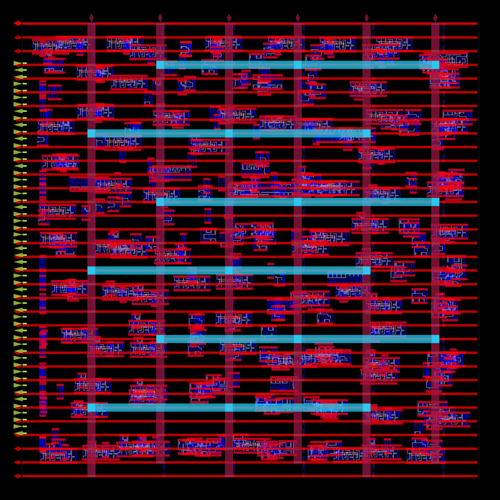

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,area,utilization
global placement,4088.922 μm²,50.78 %


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,internal,switching,leakage,total
sequential,1857.089 uW,78.889 uW,1.956 uW,1937.933 uW
combinational,249.064 uW,225.718 uW,2.073 uW,476.855 uW
clock,0.000 uW,0.000 uW,0.000 uW,0.000 uW
macro,0.000 uW,0.000 uW,0.000 uW,0.000 uW
pad,0.000 uW,0.000 uW,0.000 uW,0.000 uW
total,2106.152 uW,304.607 uW,4.029 uW,2414.788 uW


<IPython.core.display.Javascript object>

In [ ]:
#@title Now we will synthesize the Traffic Signal Architecture {display-mode: "form"}
#@markdown - Click the ▷ button to run synthesis, static timing analysis and global placement

placement_density = 1 #@param {type:"slider", min:0, max:1.0, step:0.01}
clock_period_ps = 2011 #@param {type:"slider", min:0, max:100000, step:1}
clock_period_ns = clock_period_ps / 1000.0
core_area = 'absolute' # @param ["relative", "absolute"]

# @markdown ### core_area_relative
# @markdown compute core area from the design size
utilization_percent = 94 #@param {type:"slider", min:0, max:100, step:1}
# @markdown ### core_area_absolute
# @markdown set core area explicitly
core_width_microns = 90 #@param {type:"slider", min:0, max:1000, step:1}
core_padding_microns = 0 #@param {type:"slider", min:0, max:100, step:1}

from IPython.display import display, display_png
import IPython.display
import PIL.Image

if core_area == 'relative':
  core_area_value = RelativeCoreArea(utilization_percent)
else:
  core_area_value = AbsoluteCoreArea(core_width_microns, core_padding_microns)

tb = widgets.TabBar(['synthesis', 'netlist', 'timing', 'placement', 'area', 'power'])

# run yosys synthesis
with tb.output_to('synthesis', select=True):
  synth_results = run_synthesis()
  tb.clear_tab()

with tb.output_to('synthesis', select=False):
  grid = widgets.Grid(1, 2, header_row=False, header_column=False)
  with grid.output_to(0, 0):
    display(synth_results.cell_stats)
  with grid.output_to(0, 1):
    display(synth_results.design_stats)

# display gate level netlist
with tb.output_to('netlist', select=False):
  with synth_results.synth_v.open('r') as f:
    print(f.read())


# run opensta static timing analysis
with tb.output_to('timing', select=True):
  opensta_results = run_opensta()
  tb.clear_tab()

# display opensta report
with tb.output_to('timing', select=False):
  display(
      opensta_results.style.hide(axis='index')
      .background_gradient(subset=['delay'], cmap='Oranges')
      .bar(subset=['time'], color='lightblue')
  )

# run openroad placement
with tb.output_to('placement', select=True):
  placement_results = run_placement(
      clock_period_ps=clock_period_ps,
      placement_density=placement_density,
      core_area=core_area_value,
  )
  tb.clear_tab()

# display global placement layout
with tb.output_to('placement', select=False):
  if placement_results.openroad_global_placement_layout.exists():
    img = PIL.Image.open(placement_results.openroad_global_placement_layout)
    img = img.resize((500, 500))
    display_png(img)

# display area estimate
with tb.output_to('area', select=False):
  display(
      placement_results.area.style.format('{:.3f} μm²', subset=['area'])
      .format('{:.2f} %', subset=['utilization'])
      .bar(subset=['utilization'], color='lightblue', vmin=0, vmax=100)
  )

# display power metrics
with tb.output_to('power', select=False):
  display(
      placement_results.power.style.format('{:.3f} uW')
      .background_gradient(
          subset=pd.IndexSlice[
              placement_results.power.index[:-1], ['internal', 'switching', 'leakage']
          ],
          cmap='Oranges',
          axis=None,
      )
      .bar(subset=['total'], color='lightcoral')
      .bar(
          subset=pd.IndexSlice[placement_results.power.index[-1:], :],
          color='lightcoral',
          axis='columns',
      )
  )

# 📄 README

Like what you see? 🤝 [Contact us](https://docs.google.com/forms/d/e/1FAIpQLSd1DNMoOxxr73mkIrZXhDWd1gn-jSsL7SMQry6y_JK0caDKlg/viewform?resourcekey=0-1YtZY34PHo-vug_UmFrMQg) 💬 [Join the chat](https://chat.google.com/room/AAAA8aUpxQc?cls=4)

# 🔒 Privacy

 `%%dslx` cell execution count is tracked using [Google Analytics](https://developers.google.com/analytics).